# EDA Análisis exploratorio de datos

### Importamos librerias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from summarytools import dfSummary
import matplotlib.pyplot as plt
import warnings

### Importamos la base de datos

In [3]:
df=pd.read_csv(r'C:\Users\maxyf\Downloads\Proyecto 2\data\casos.csv')

In [4]:
df.head(3)

,Id,Fecha,Año,Mes,Día,Día semana,Hora Min Seg,Hora,Num victimas,Participantes,...,Tipo de calle,Calle,Cruce,Dirección normalizada,Comuna,Xy (caba),Coordenadas x,Coordenadas y,Pos x,Pos y
0,2016-0001,2016-01-01,2016.0,1.0,1.0,Viernes,04:00:00,4.0,1,MOTO-AUTO,...,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",Comuna 8,Point (98896.78238426 93532.43437792),98896.782384,93532.434378,-58.475340,-34.687570
1,2016-0002,2016-01-02,2016.0,1.0,2.0,Sabado,01:15:00,1.0,1,AUTO-PASAJEROS,...,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",Comuna 9,Point (95832.05571093 95505.41641999),95832.055711,95505.416420,-58.508775,-34.669777
2,2016-0003,2016-01-03,2016.0,1.0,3.0,Domingo,07:00:00,7.0,1,MOTO-AUTO,...,AVENIDA,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,Comuna 1,Point (106684.29090040 99706.57687843),106684.290900,99706.576878,-58.390403,-34.631894


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     717 non-null    object 
 1   Fecha                  702 non-null    object 
 2   Año                    702 non-null    float64
 3   Mes                    702 non-null    float64
 4   Día                    702 non-null    float64
 5   Día semana             702 non-null    object 
 6   Hora Min Seg           702 non-null    object 
 7   Hora                   701 non-null    float64
 8   Num victimas           717 non-null    int64  
 9   Participantes          702 non-null    object 
 10  Rol                    717 non-null    object 
 11  Acusado                702 non-null    object 
 12  Victima                702 non-null    object 
 13  Sexo                   717 non-null    object 
 14  Edad                   717 non-null    int64  
 15  Rango 

#### Outliers

Se realiza la busqueda de datos Outliers y se analiza si es necesario eliminarlos. 

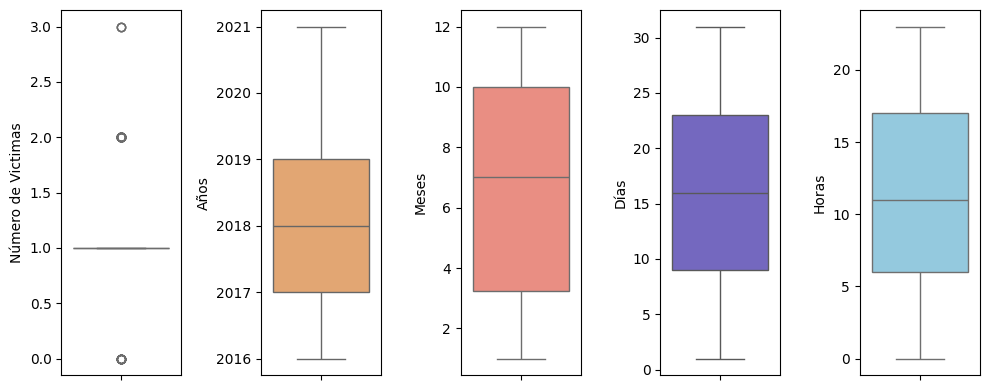

In [6]:
plt.figure(figsize=(10, 4)) #Ajustamos el tamaño de la figura

#Creamos subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='Num victimas', color = "#FA8072")
plt.ylabel('Número de Victimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='Año', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='Mes', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='Día', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='Hora', color = "#87CEEB")
plt.ylabel('Horas')

plt.tight_layout() #Ajustamos espaciado entre subplots

plt.show()

#### Conlusión

Los Outliers que se encuentran Num víctimas (valores 2 o 3), se producen debido a que en la mayoria de los casos el registro es el valor uno (1); con respecto a las victimas en los siniestros. 

## Variables Numéricas

El dataset contiene variables numéricas pero su utilización como tales va a depender del contexto de los datos.

En éste caso se utiliza un mapa de correlaciones para examinar si existen, relaciones entre los datos númericos o se utilizarán como categóricos (en algunos casos).

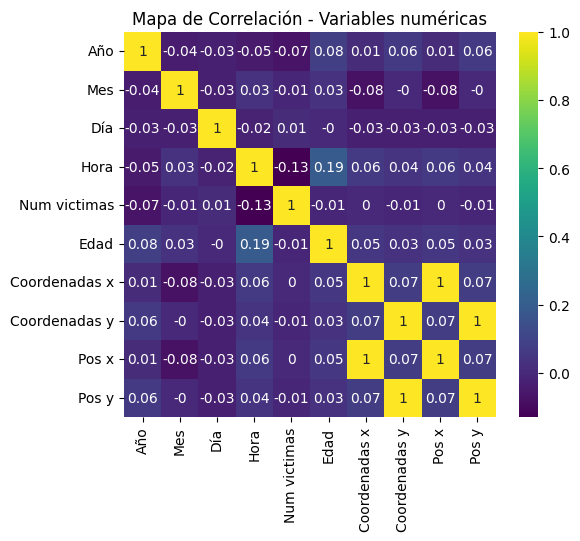

In [7]:
#Creamos el mapa de calor con las correlaciones de los datos que tengan números
datosnumericos = df.select_dtypes(include=['number']) 
corr = datosnumericos.corr().round(2)

plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

El cruzamiento de todas las variables numéricas en la matriz resulta con relaciones positivas fuertes entre las features Coordenada y Pos

Se puede verificar también una correlacíon positiva leve entre la variable Edad y Hora

Las demás correlaciones son negativas, hecho que se esperaba debido a que el numero de victimas de un siniestro no se vincula a una fecha u hora puntual.

#### Distribucion de Numero de Victimas
Analizamos la variable Num victimas ya que el objetivo del proyecto es disminuir la cantidad de victimas en siniestros viales

In [8]:
df['Num victimas'].describe()

count    717.000000
mean       1.037657
std        0.294226
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num victimas, dtype: float64

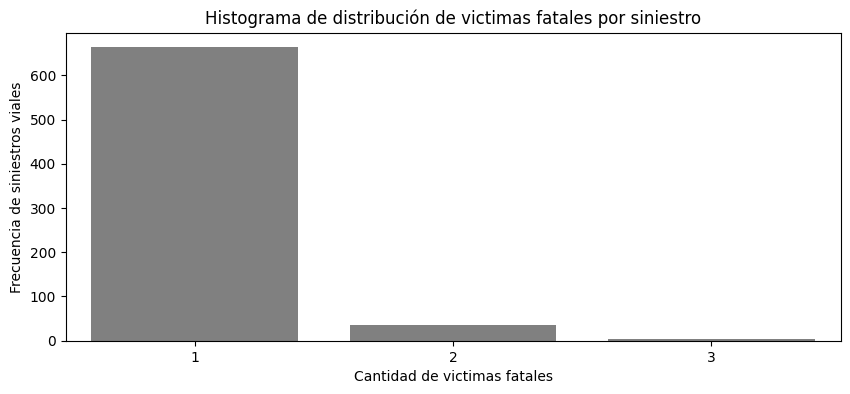

In [9]:
plt.figure(figsize=(10, 4))

df_filtrado = df[df['Num victimas'] != 0] #Filtramos los valores sin datos o nulos 

sns.countplot(df_filtrado, x='Num victimas', color='grey') #Contamos los datos de la columna y calculamos la frecuencia en que se distribuye

plt.ylabel('Frecuencia de siniestros viales')
plt.xlabel('Cantidad de victimas fatales')
plt.title('Histograma de distribución de victimas fatales por siniestro')

plt.show()

#### Conclusión

En la mayoria de los casos la cantidad de vitimas fatales es de 1, siendo el 75% de los casos

#### Relación de Num victimas con el tiempos

Analizamos los datos teniendo en cuenta el tiempo para ver si hay un patrón en los accidentes

In [10]:
rel_tiempo = df.groupby(['Año', 'Mes'])['Num victimas'].sum().reset_index() #Vemos el número de victmas por año y mes

In [11]:
rel_tiempo

,Año,Mes,Num victimas
0,2016.0,1.0,8
1,2016.0,2.0,12
2,2016.0,3.0,15
3,2016.0,4.0,9
4,2016.0,5.0,7
...,...,...,...
67,2021.0,8.0,9
68,2021.0,9.0,4
69,2021.0,10.0,5
70,2021.0,11.0,8


In [12]:
#Pasamos los datos a enteros para realizar el gráfico
rel_tiempo['Año']= rel_tiempo['Año'].astype('Int64')
rel_tiempo['Mes']= rel_tiempo['Mes'].astype('Int64')

In [13]:
rel_tiempo

,Año,Mes,Num victimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,9
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [14]:
# Combinamos Año y Mes y sacamos una variable de tiempo, creando la columna Fecha como str
rel_tiempo['Fecha'] = rel_tiempo['Año'].astype(str) + '-' + rel_tiempo['Mes'].astype(str)

# Convertir la variable de tiempo a formato datetime
rel_tiempo['Fecha'] = pd.to_datetime(rel_tiempo['Fecha'])

# Ordenar el DataFrame por fecha para que tenga orden cronológico
rel_tiempo = rel_tiempo.sort_values('Fecha')

Creamos un gráfico de lineas

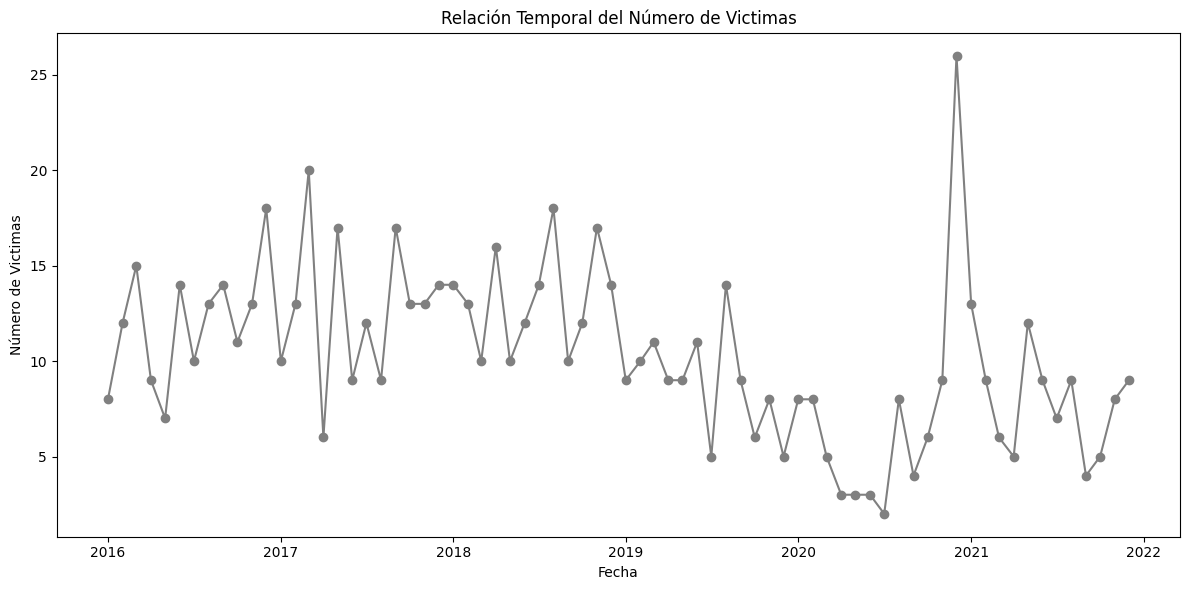

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo['Fecha'], rel_tiempo['Num victimas'], marker='o', color='grey')

#Añadimos títulos y etiquetas

plt.title('Relación Temporal del Número de Victimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Victimas')

plt.tight_layout()
plt.show()

#### Conclusión

Podemos ver que la mayor cantidad de accidentes constantes se da entre 2017 y 2018.

Luego de esos años podemos ver una disminución de accidentes.

En 2020 hubieron muy pocos accidentes viales gracias a la pandemia en ese año.

A fines del año 2020 hubo un pico que es el mayor numero de vitimas mensuales en los años analizados.

#### Distribución temporal de victimas

Creamos un gráfico de barras donde podamos ver la cantidad de accidentes por mes

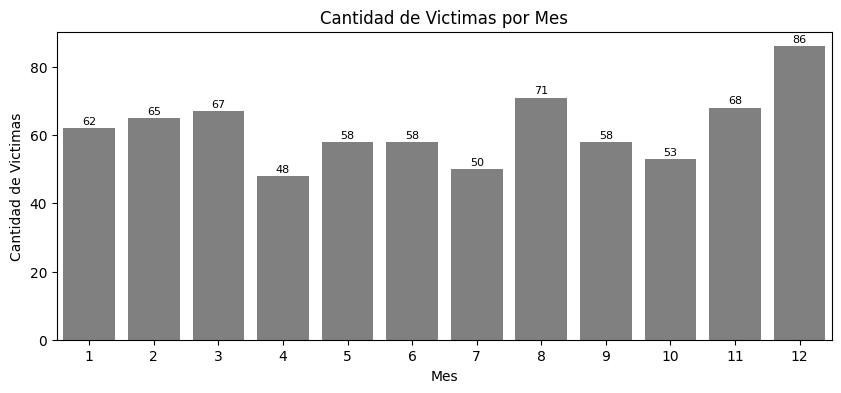

In [16]:
datos = df.groupby(['Mes'])['Num victimas'].sum().reset_index() #Agrupamos las victimas por mes
datos['Mes']=datos['Mes'].astype('Int64')

plt.figure(figsize=(10,4)) #Graficamos

ax = sns.barplot(x='Mes', y='Num victimas', data=datos, color='grey')

#Asignamos los nombres
ax.set_title('Cantidad de Victimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Victimas')

#Agregamos etiquetas con el número en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Creamos un gráfico de barras donde podamos ver la cantidad de accidentes por día de mes

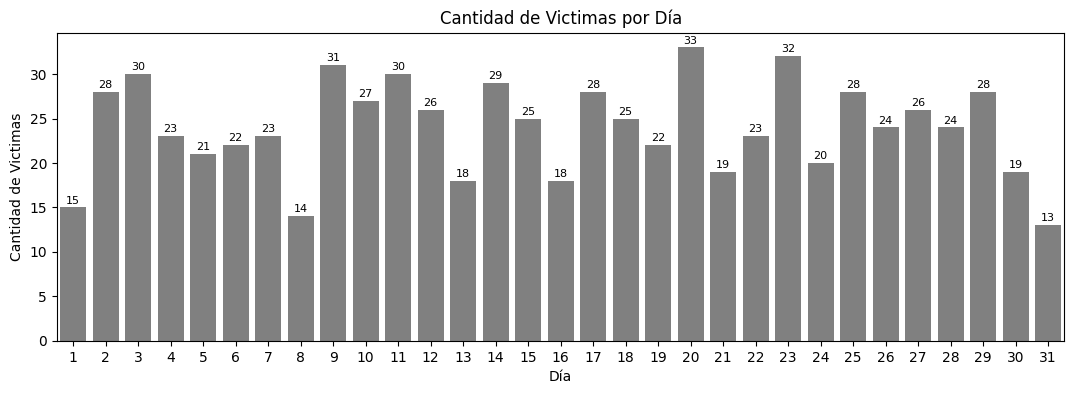

In [17]:
data = df.groupby(['Día'])['Num victimas'].sum().reset_index() #Agrupamos las victimas por dia
data['Día']=data['Día'].astype('Int64') 

plt.figure(figsize=(13,4)) #Graficamos

ax = sns.barplot(x='Día', y='Num victimas', data=data, color='grey')

#Asignamos los nombres
ax.set_title('Cantidad de Victimas por Día')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de Victimas')

#Agregamos etiquetas con el número en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Creamos un gráfico de barras donde podamos ver la cantidad de accidentes por día de semana

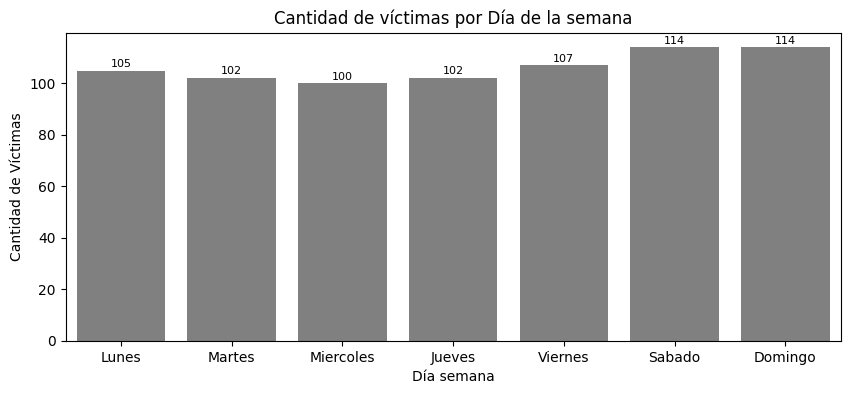

In [18]:
data = df.groupby(['Día semana'])['Num victimas'].sum().reset_index()  #Agrupamos las victimas por día de semana

orden= ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']  #Definimos el orden de los días

data['Orden'] = data['Día semana'].apply(lambda x: orden.index(x))  #Creamos una columna 'Orden' para representar el orden de los días de la semana

data = data.sort_values(by='Orden')  #Ordenamos según el orden numérico de los días de la semana

plt.figure(figsize=(10, 4))  #Graficamos

ax = sns.barplot(x='Día semana', y='Num victimas', data=data, color='grey')

#Asignamos los nombres
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana')
ax.set_ylabel('Cantidad de Víctimas')

#Agregamos etiquetas
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#### Relación de horas y dias 

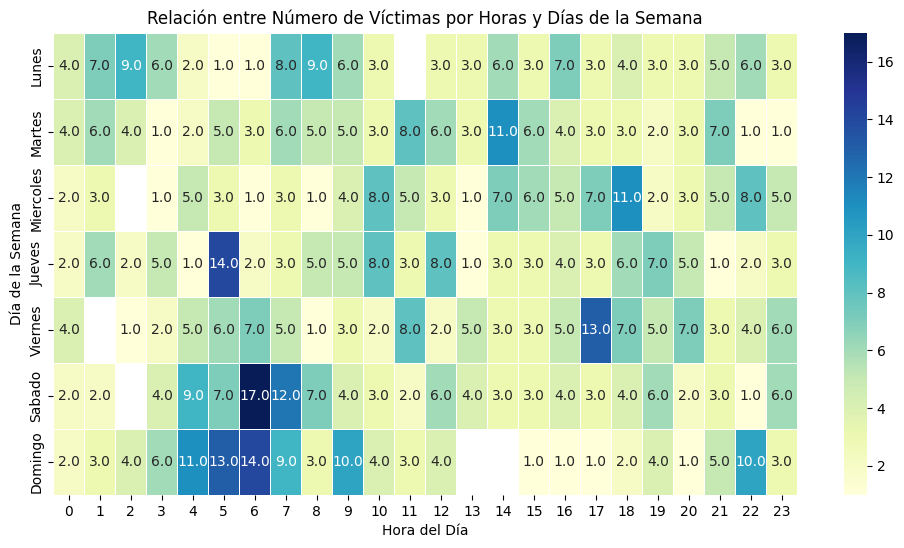

In [19]:
data = df.groupby(['Día semana', 'Hora'])['Num victimas'].sum().reset_index() #Agrupamos los datos en cantidad de victimas por dia y hora 
data['Hora']=data['Hora'].astype('Int64')

data['Orden'] = data['Día semana'].apply(lambda x: orden.index(x)) #Creamos una columna Orden para representar el orden numérico de los días de la semana

data = data.sort_values(by='Orden') #Ordenamos según el orden numérico de los días de la semana

#Creamos una tabla pivot para los datos
pivot = data.pivot_table(index= 'Día semana', columns='Hora', values='Num victimas', aggfunc='sum')
pivot = pivot.reindex(orden)

#Creamos un mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)

#Etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')


plt.show()


#### Conclusión

El mes con mas victimas es en Diciembre con 86

El 20 de cada mes en promedio tiene mayor cantidad de victimas

Los Sabados y Domingos son los días con mayor cantidad de victimas 

Los Sabados y Domingos la mayor cantidad de accidentes se suelen dar entre las 3:00 hs y las 9:00 hs (probablemente tenga que ver con las salida del boliche)

Los Sabados a las 6 horas se da el pico mas grande de accidentes


#### Edad de las víctimas

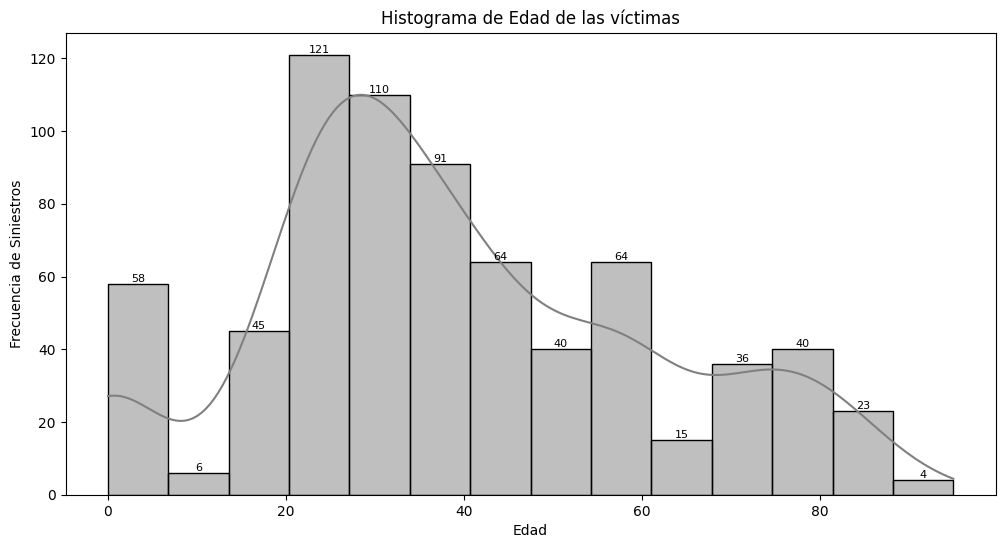

In [20]:
plt.figure(figsize=(12, 6)) #Graficamos el histograma de la edad

#Definimos el histograma y le agragamos una línea de suavizado
sns.histplot(df['Edad'], kde=True, color='gray') 
plt.title('Histograma de Edad de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de Siniestros')

#Agregamos etiquetas de datos en el histograma
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8, color='black')

plt.show() 


La mayor cantidad de victimas se da entre los 20 y 40 años

In [21]:
df['Edad'].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

Se puede ver que el 75% de las victimas son menores o iguales a 55 años, la mediana es de 39 años. 

#### Relación de Edad , Sexo y Hora

Creamos un gráfico de dispersión que represente la relación entre edad y la hora 

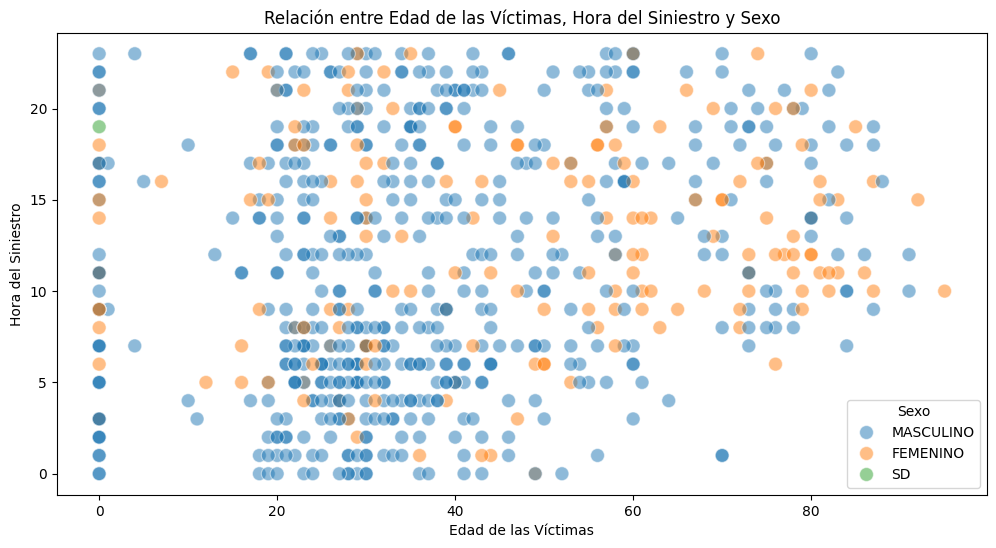

In [22]:
data = df.groupby(['Edad', 'Hora', 'Sexo'])['Num victimas'].sum().reset_index() #Agrupamos los datos en cantidad de victimas por edad y horas 
data['Edad']=data['Edad'].astype('Int64')
data['Hora']=data['Hora'].astype('Int64')

#Creamos el gráfico de dispersión para la relación entre edad, hora y sexo
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Edad', y='Hora', hue='Sexo', alpha=0.5, palette='tab10', s=100)

# Agregar etiquetas a los ejes
plt.xlabel('Edad de las Víctimas')
plt.ylabel('Hora del Siniestro')
plt.title('Relación entre Edad de las Víctimas, Hora del Siniestro y Sexo')

plt.legend(title='Sexo') #Agregamos una leyenda

plt.show()

#### Conclusión
Las edades de mayor ocurrencia es entre 20 y 40 años desde las 5 a las 9 hs

Las victimas tienden a ser Masculinas

#### Victimas por edad según el sexo


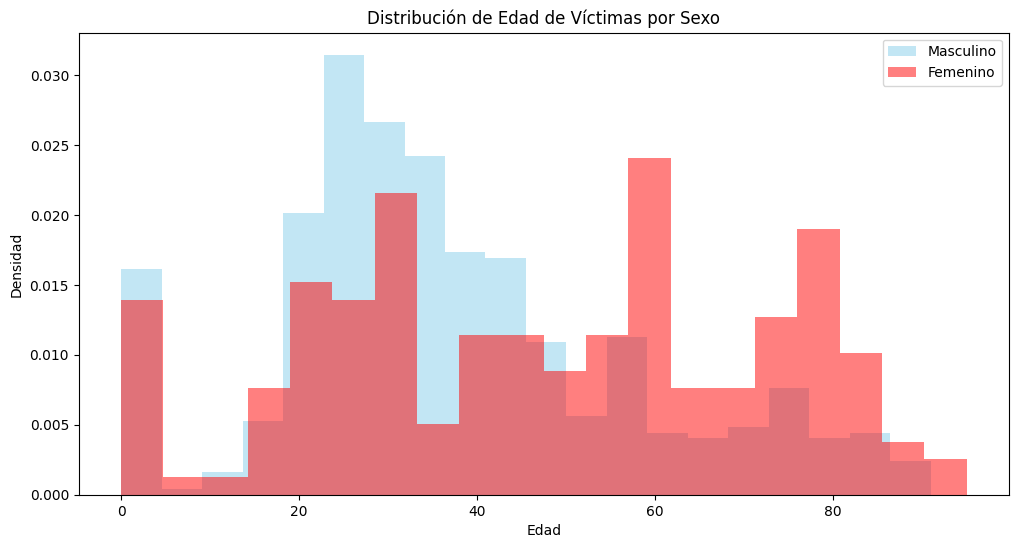

In [23]:
masc = df[df['Sexo'] == 'MASCULINO']['Edad'].dropna() #Filtramos el sexo masculino

fem = df[df['Sexo'] == 'FEMENINO']['Edad'].dropna() #Filtramos el sexo femenino

#Creamos el histograma
plt.figure(figsize=(12, 6))
plt.hist(masc, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(fem, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.title('Distribución de Edad de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#### Conclusión

Las victimas hombres suelen tener entre 20 y 40 años

Las victimas mujeres suelen tener entre 40, 60 y 80 años 

#### Boxplot de las edades por año

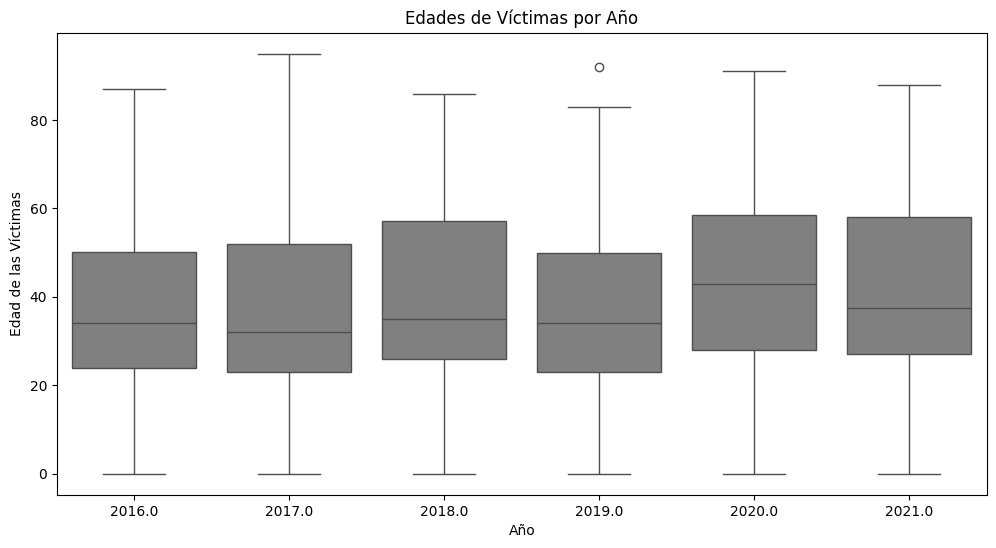

In [24]:
dato = df.groupby(['Edad', "Año"])['Num victimas'].sum().reset_index() #Agrupamos edad y  año

#Creamos el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=df, color='grey')

plt.title('Edades de Víctimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')

plt.show()


#### Conclusión
La mediana de la edad de las victimas a lo largo de los años sigue siendo 39 años y en el año 2020 podemos ver que esta barrera se rompe

## Variables Categóricas


#### Distribucion por tipo de calle

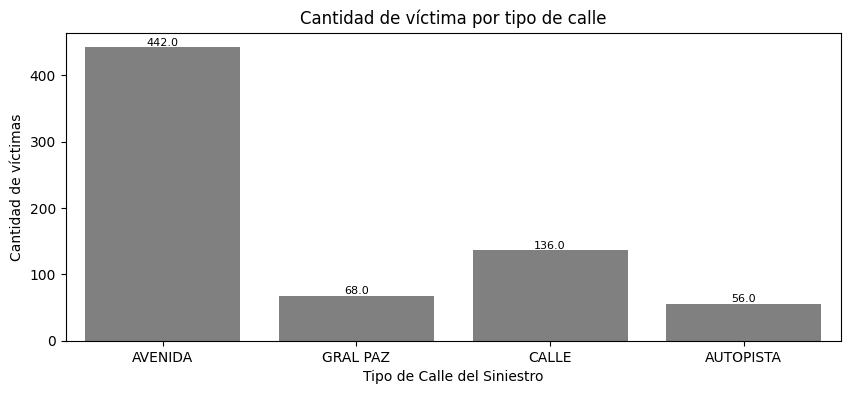

In [25]:
plt.figure(figsize=(10, 4)) #Creamos un grafico de barras

ax=sns.countplot(df, x='Tipo de calle', color='grey')

#Agregamos la cantidad de víctimas por tipo de calle
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

#### Conclusión 
Hay una tendencia muy alta a que los accidentes sean en avenidas

#### Distribucion de Participantes

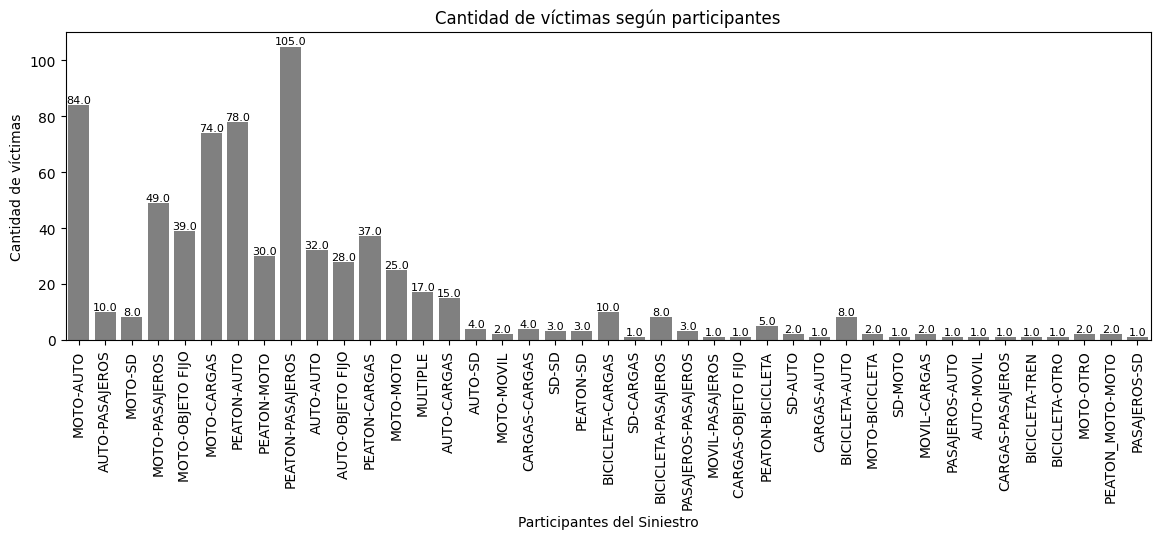

In [26]:
plt.figure(figsize=(14, 4)) #Creamos el gráfico de barras

ax=sns.countplot(df, x='Participantes', color='grey')

#Agregamos la cantidad víctimas en los participantes
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90)#Los titulos de las barras se ponen a 90 grados para que sean legibles

plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

#### Conclusión
Los valores de participación que tienen mas victimas están en Peaton - Pasajero (Pasajero: Personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia)

Le siguen Moto - Auto, Peaton - Auto y Moto - Cargas (Cargas: Vehículo a motor destiando al transporte de cargas, incluye camiones pesados (con o sin acoplado o semirremolque, etc., camión de recolección de residuos) y livianos (utilitarios, furgonetas, pick-ups, camioneta con caja de carga).)


#### Distribución de los acusados

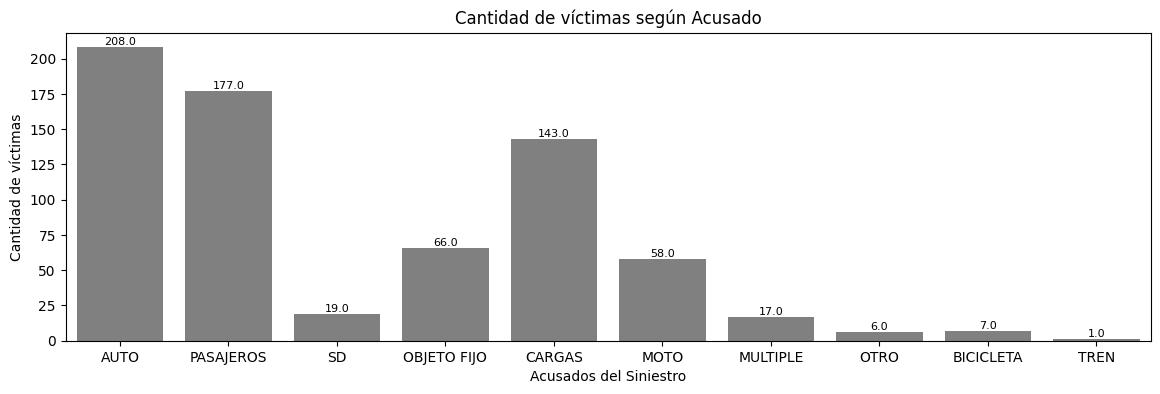

In [27]:
plt.figure(figsize=(14, 4)) #Creamos el gráfico

ax=sns.countplot(df, x='Acusado', color='grey')

#Agregamos el número de víctimas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

#### Conclusión

Los acusados generalmente son Autos, Cargas y Pasajeros en menor medida

#### Distribución de Víctimas en los siniestros

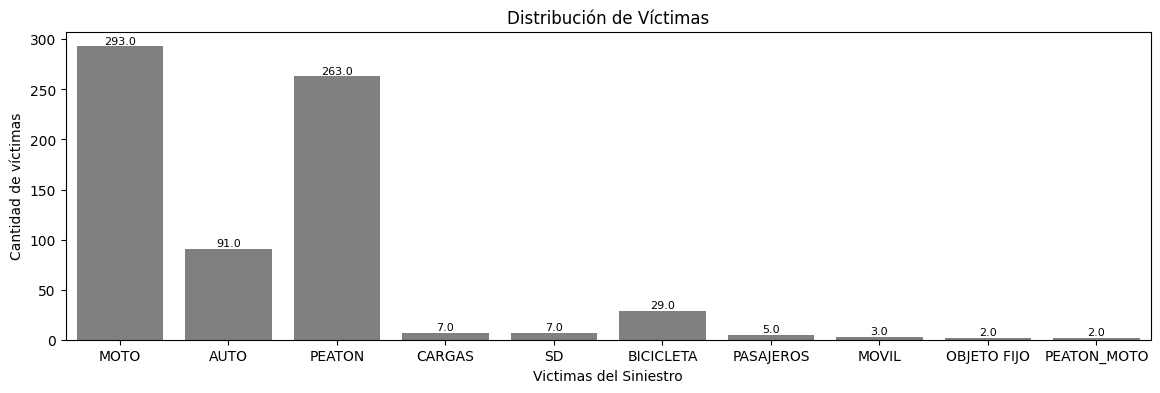

In [28]:
plt.figure(figsize=(14, 4)) #Creamos el gráfico de barras

ax=sns.countplot(df, x='Victima', color='grey')

#Agregamos el número de víctimas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

#### Conclusión
Se puede ver que las victimas tienden a ser Motos, Peatones.

#### Relacion Victima Acusado

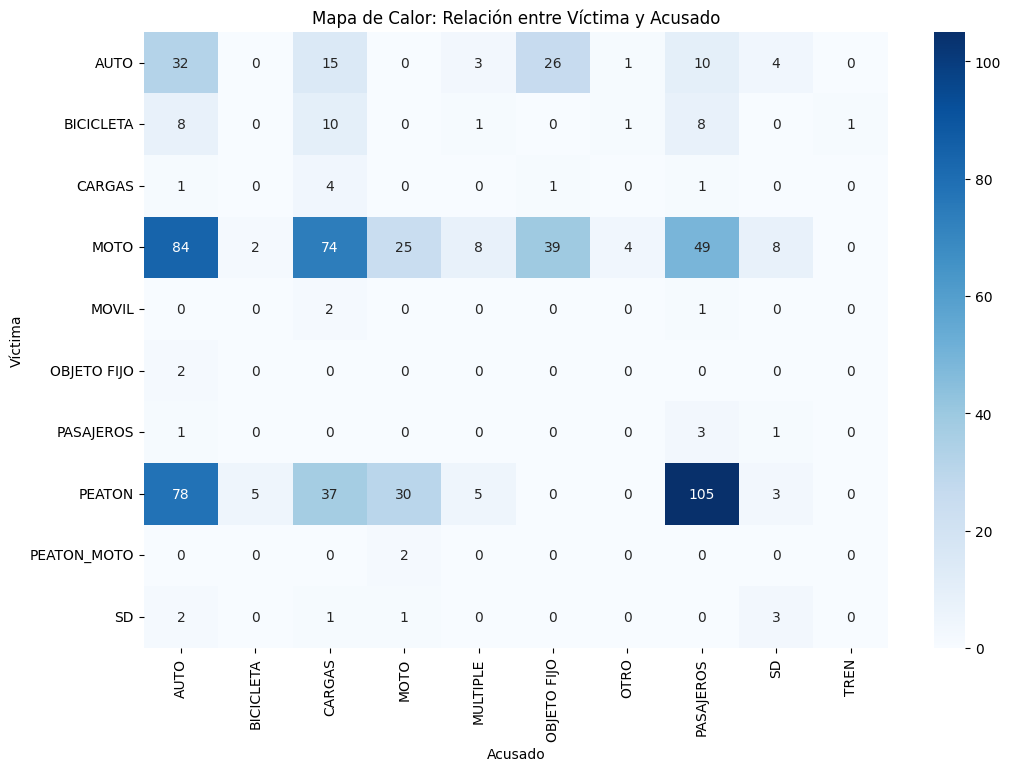

In [29]:
tabla_contingencia = pd.crosstab(df['Victima'], df['Acusado'], margins=False) #Creamos la tabla de contingencia

# Visualizamos la tabla de contingencia como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Mapa de Calor: Relación entre Víctima y Acusado')
plt.xlabel('Acusado')
plt.ylabel('Víctima')
plt.show()


#### Conclusión 

Cuando el acusado es un auto, las victimas tienden a ser Motos, Peatones y otros Autos
Cuando el acusado es cargas, las victimas en mayor medida son Motos y Peatones
Cuando el acusado es un pasajero, las victimas son Peatones y Motos

#### Proporción de víctimas por sexo

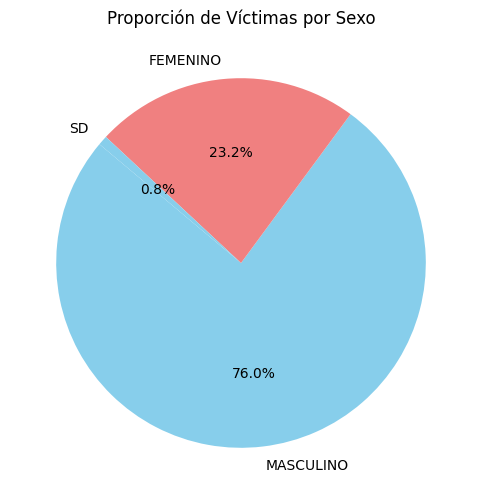

In [30]:
proporcion = df['Sexo'].value_counts(normalize=True) * 100 #Calculamos la proporción de víctimas por sexo

#Preparamos los datos para el gráfico de torta
lab = proporcion.index
siz = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

#Graficamos
plt.pie(siz, labels=lab, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')
plt.show()

#### Conclusión

El 76% de las victimas son Hombres

El 23.2% de las victimas son Mujeres

El 0.8% de las victimas nos Sin Datos

#### Distribución de los roles de las víctimas por Sexo

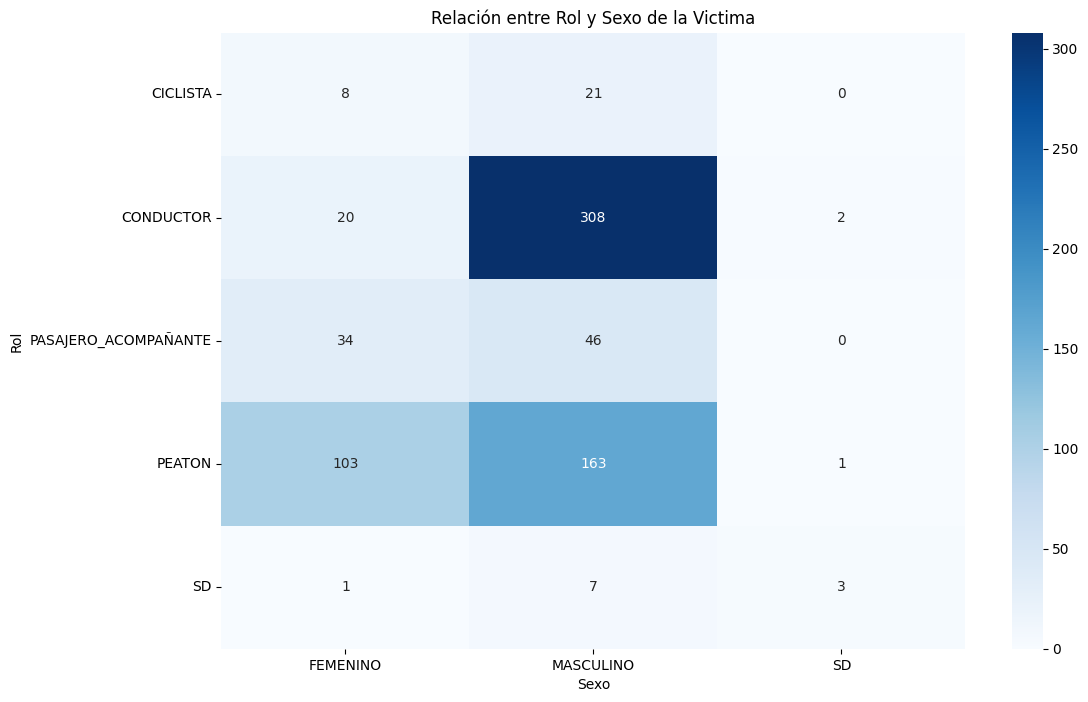

In [31]:
tabla_contingencia = pd.crosstab(df['Rol'], df['Sexo']) #Creamos la tabla de contingencia

# Visualizamos la tabla de contingencia como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Relación entre Rol y Sexo de la Victima')
plt.xlabel('Sexo')
plt.ylabel('Rol')
plt.show()


#### Conclusión

La mayor cantidad de victimas son Conductores y luego Peatones

Las victimas masculinas tienen a ser Conductores y Peatones

Las victimas mujeres tienen a ser Peatones seguido por Pasajero-Acompañante

#### Distribución de Victimas por Sexo y tipo de victima

C:\Users\maxyf\AppData\Local\Temp\ipykernel_14516\4155648542.py:11: UserWarning: Mismatched number of handles and labels: len(handles) = 3 len(labels) = 2
  plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')


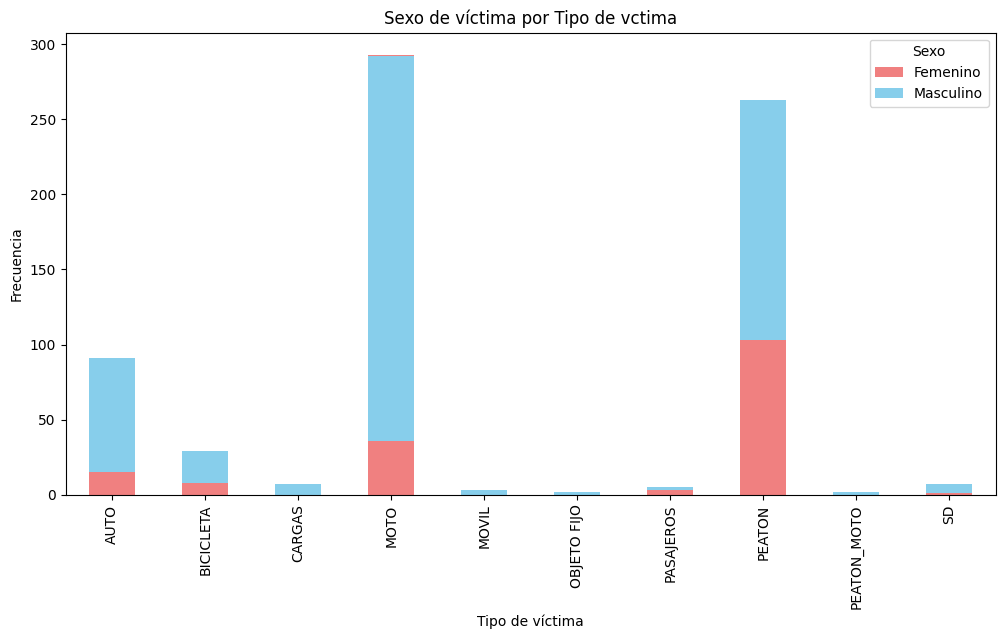

In [32]:
tabla_contingencia = pd.crosstab(df['Victima'], df['Sexo']) #Creamos una tabla de contingencia

#Creamos un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Sexo de víctima por Tipo de vctima')
plt.xlabel('Tipo de víctima')
plt.ylabel('Frecuencia')

#Agregamos una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')
plt.show()

#### Conclusión

La mayor cantidad de víctimas son en Moto y generalmente son Hombres

El segundo tipo de víctima suelen ser los peatones támbien con mayor proporción a ser hombre

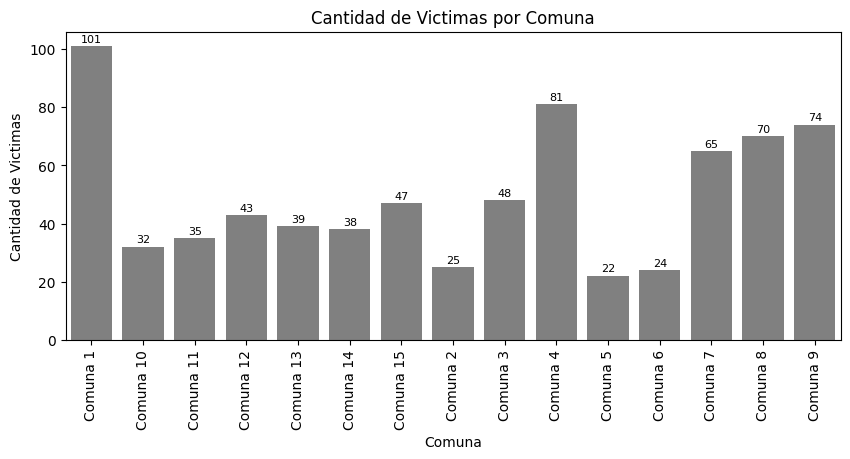

In [33]:
datos = df.groupby(['Comuna'])['Num victimas'].sum().reset_index() #Agrupamos las victimas por mes

plt.figure(figsize=(10,4)) #Graficamos

ax = sns.barplot(x='Comuna', y='Num victimas', data=datos, color='grey')

#Asignamos los nombres
ax.set_title('Cantidad de Victimas por Comuna')
ax.set_xlabel('Comuna') ; ax.set_ylabel('Cantidad de Victimas')
plt.xticks(rotation=90)

#Agregamos etiquetas con el número en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#### Conclusión 

En la comuna donde mas accidentes suceden es en la comuna 1 seguida por la 4 